In [33]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [34]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")

In [35]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

In [36]:
df_train.drop(['prijs'], axis=1)

,bouwjaar,kilometer_stand,vermogen,is_handgeschakeld,is_benzine
386,2011,24700,84,1,0
231,2006,190637,77,1,1
349,2011,192950,86,1,0
448,2010,72757,78,0,1
302,2010,169615,84,1,0
...,...,...,...,...,...
20,2010,217393,84,1,0
71,2008,182219,67,1,1
106,2008,156209,65,1,1
435,2010,146846,78,1,1


12/12 [==============================] - 0s 1ms/step - loss: 478515.6875 - mae: 490.5081 - mse: 478515.6875


(0.0, 399.0)

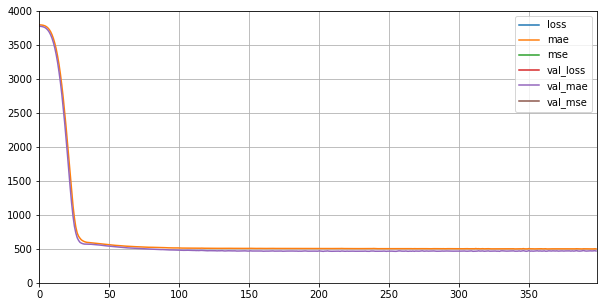

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(5, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0075)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
    X_train_tf, 
    y_train_tf, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid),
    verbose=0,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [41]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto/assets


['TFAuto/TFScaler.pkl']